In [7]:
%run 4.2_AutoDL.ipynb

In [4]:
"""df_import = pd.DataFrame(columns=["image_size","batch_size","epochs","DataGenerator", "optimizer","fonction loss",
                                  "loss","acc", "val_loss","val_acc", "Duree_entrainement en sec"])
import joblib
from joblib import dump, load
dump(df_import,"df_score_DL.joblib")"""

['df_score_DL.joblib']

## Application de la fonction principale de test_DL

In [9]:
#Choix des différentes variables de notre fonction test_DL
nom_fichier_controle = 'VGG16_1'
#chemin où sont stockées les images d'entrainement classées 
repertoire_train = get_output_path_folder("images_traitees_classe_train")
repertoire_test = get_output_path_folder("images_traitees_classe_test")

#chemin où est stocké le dataFrame de suivi
chemin_df_score_DL = get_output_path_file("df_score_DL.joblib")

#Nos variables
image_size = (224,224)
batch_size = 30
epochs = 10
validation_split = 0.2
seed = 123  

from tensorflow.keras.layers.experimental.preprocessing import RandomFlip,RandomZoom,RandomWidth,Rescaling,RandomRotation
from tensorflow.keras.layers import RandomBrightness
#DataAugmentation
data_augmentation = keras.Sequential([
   RandomFlip("horizontal",seed=123),     #Inversion horizontale aléatoire des images
   RandomZoom(height_factor=(-0.05, -0.15),width_factor=(-0.05, -0.15),seed=123), #Zoom aléatoire des images jusqu'à 15%
   RandomWidth(factor=(0.2, 0.3), interpolation='bilinear', seed=123), #ajustement aléatoire de la largeur d'un batch d'images par un facteur aléatoire
   RandomBrightness(factor =(0.1, 0.3), value_range=(0, 255), seed=123),#ajustement aléatoire de la luminosité d'images d'entrée RGB, différents facteurs par images d'un même batch
   RandomRotation(0.2)
])

#Notre modèle à tester, éventuellement une liste de modèles
base_model = VGG16(weights='imagenet', include_top=False)
for layer in base_model.layers:
    layer.trainable = False    
model = Sequential()
model.add(data_augmentation)
model.add(Rescaling(1./255))
model.add(base_model)
model.add(GlobalAveragePooling2D()) 
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(27, activation='softmax'))
liste_modele=[model]

#les varaibles lors du .compile
optimizer='adam'
loss='categorical_crossentropy'
metrics=['acc']

#lancement de la fonction test_DL
df_score_DL = test_DL_predict(repertoire_train,repertoire_test,image_size,batch_size,validation_split,liste_modele,optimizer,loss,
                    metrics,epochs,chemin_df_score_DL,nom_fichier_controle)
dump(df_score_DL,get_output_path_file("df_score_DL.joblib"))

Found 67931 files belonging to 27 classes.
Using 54345 files for training.
Found 67931 files belonging to 27 classes.
Using 13586 files for validation.
Found 16983 files belonging to 27 classes.
récupération du df existant
debut de l'entrainement du modèle 0
Epoch 1/10
60/60 [==============================] - ETA: 0s - loss: 3.0655 - acc: 0.1333
Epoch 1: saving model to C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles
INFO:tensorflow:Assets written to: C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 245s 4s/step - loss: 3.0655 - acc: 0.1333 - val_loss: 2.8834 - val_acc: 0.1800 - lr: 0.0010
Epoch 2/10
60/60 [==============================] - ETA: 0s - loss: 2.7751 - acc: 0.1983
Epoch 2: saving model to C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles
INFO:tensorflow:Assets written to: C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 246s 4s/step - loss: 2.7751 - acc: 0.1983 - val_loss: 2.6673 - val_acc: 0.2644 - lr: 0.0010
Epoch 3/10
60/60 [==============================] - ETA: 0s - loss: 2.6804 - acc: 0.2194
Epoch 3: saving model to C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles
INFO:tensorflow:Assets written to: C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 242s 4s/step - loss: 2.6804 - acc: 0.2194 - val_loss: 2.5500 - val_acc: 0.2400 - lr: 0.0010
Epoch 4/10
60/60 [==============================] - ETA: 0s - loss: 2.6145 - acc: 0.2394
Epoch 4: saving model to C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles
INFO:tensorflow:Assets written to: C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 264s 4s/step - loss: 2.6145 - acc: 0.2394 - val_loss: 2.4847 - val_acc: 0.2778 - lr: 0.0010
Epoch 5/10
60/60 [==============================] - ETA: 0s - loss: 2.5588 - acc: 0.2578
Epoch 5: saving model to C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles
INFO:tensorflow:Assets written to: C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 298s 5s/step - loss: 2.5588 - acc: 0.2578 - val_loss: 2.4786 - val_acc: 0.2711 - lr: 0.0010
Epoch 6/10
60/60 [==============================] - ETA: 0s - loss: 2.5167 - acc: 0.2644
Epoch 6: saving model to C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles
INFO:tensorflow:Assets written to: C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 297s 5s/step - loss: 2.5167 - acc: 0.2644 - val_loss: 2.4359 - val_acc: 0.2933 - lr: 0.0010
Epoch 7/10
60/60 [==============================] - ETA: 0s - loss: 2.4969 - acc: 0.2683
Epoch 7: saving model to C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles
INFO:tensorflow:Assets written to: C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 300s 5s/step - loss: 2.4969 - acc: 0.2683 - val_loss: 2.4022 - val_acc: 0.2956 - lr: 0.0010
Epoch 8/10
60/60 [==============================] - ETA: 0s - loss: 2.4917 - acc: 0.2644
Epoch 8: saving model to C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles
INFO:tensorflow:Assets written to: C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 295s 5s/step - loss: 2.4917 - acc: 0.2644 - val_loss: 2.5286 - val_acc: 0.2711 - lr: 0.0010
Epoch 9/10
60/60 [==============================] - ETA: 0s - loss: 2.4822 - acc: 0.2778
Epoch 9: saving model to C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles
INFO:tensorflow:Assets written to: C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 285s 5s/step - loss: 2.4822 - acc: 0.2778 - val_loss: 2.4011 - val_acc: 0.3022 - lr: 0.0010
Epoch 10/10
60/60 [==============================] - ETA: 0s - loss: 2.4203 - acc: 0.2839Restoring model weights from the end of the best epoch: 7.

Epoch 10: saving model to C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles
INFO:tensorflow:Assets written to: C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\franc\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 273s 5s/step - loss: 2.4203 - acc: 0.2839 - val_loss: 2.4620 - val_acc: 0.3133 - lr: 0.0010
Epoch 10: early stopping
fin de l'entrainement du modèle 0
le score de test n'a pas été calculé car le score d'entrainement est trop faible


C:\Users\franc\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['C:\\Users\\franc\\AVR23_CDS_Rakuten\\notebooks\\df_score_DL.joblib']

In [10]:
#import pour vérification des résultats
df_score_DL = load(get_output_path_file("df_score_DL.joblib"))
df_score_DL

,image_size,batch_size,epochs,optimizer,fonction loss,loss,acc,val_loss,val_acc,Duree_entrainement en sec,model,DataGenerator,test_acc,Nom_fichier_contrôle
0,"(200, 200)",50,10,adam,categorical_crossentropy,"[5.441790580749512, 2.7625186443328857, 2.4680...","[0.16952380537986755, 0.28285714983940125, 0.3...","[2.7525076866149902, 2.3772521018981934, 2.250...","[0.2919999957084656, 0.3479999899864197, 0.360...",680.438432,"[{'Layer Name': 'vgg16', 'Output Shape': (None...",False,NaN,NaN
1,"(224, 224)",50,10,adam,categorical_crossentropy,"[4.807488918304443, 2.724853038787842, 2.47779...","[0.19238094985485077, 0.2904762029647827, 0.32...","[2.650963068008423, 2.3417115211486816, 2.3388...","[0.3240000009536743, 0.3720000088214874, 0.356...",446.973389,"[{'Layer Name': 'vgg16', 'Output Shape': (None...",False,NaN,NaN
2,"(224, 224)",25,10,adam,categorical_crossentropy,"[3.6242103576660156, 2.447580575942993, 2.2302...","[0.23255814611911774, 0.3241860568523407, 0.35...","[2.5152347087860107, 2.2049500942230225, 2.117...","[0.28761905431747437, 0.380952388048172, 0.400...",1396.983790,"[{'Layer Name': 'vgg16', 'Output Shape': (None...",False,NaN,NaN
3,"(250, 250)",25,10,adam,categorical_crossentropy,"[3.4005963802337646, 2.4055991172790527, 2.237...","[0.25302326679229736, 0.32744187116622925, 0.3...","[2.402733564376831, 2.1710216999053955, 2.1736...","[0.3161904811859131, 0.4057142734527588, 0.392...",1710.653842,"[{'Layer Name': 'vgg16', 'Output Shape': (None...",False,NaN,NaN
4,"(224, 224)",15,10,adam,categorical_crossentropy,"[3.173119306564331, 2.3150925636291504, 2.1566...","[0.27302905917167664, 0.3579529821872711, 0.37...","[2.2183678150177, 2.1087968349456787, 2.026694...","[0.38555556535720825, 0.3977777659893036, 0.41...",2424.531884,"[{'Layer Name': 'vgg16', 'Output Shape': (None...",False,NaN,NaN
5,"(250, 250)",15,10,adam,categorical_crossentropy,"[3.0182101726531982, 2.29129958152771, 2.18338...","[0.2782849371433258, 0.3488243520259857, 0.381...","[2.20224666595459, 2.117244243621826, 2.061810...","[0.36666667461395264, 0.3911111056804657, 0.42...",2227.105716,"[{'Layer Name': 'vgg16', 'Output Shape': (None...",False,NaN,NaN
6,"(300, 300)",30,10,adam,categorical_crossentropy,"[3.3284459114074707, 2.455451726913452, 2.2740...","[0.24500000476837158, 0.3199999928474426, 0.35...","[2.4557855129241943, 2.2888100147247314, 2.140...","[0.2888889014720917, 0.3311111032962799, 0.371...",2231.963330,"[{'Layer Name': 'vgg16', 'Output Shape': (None...",False,NaN,NaN
7,"(224, 224)",64,10,adam,categorical_crossentropy,"[3.2148096561431885, 2.905585765838623, 2.8089...","[0.12259615212678909, 0.1850961595773697, 0.19...","[2.9184703826904297, 2.8729121685028076, 2.703...","[0.203125, 0.171875, 0.2395833283662796, 0.244...",108.889659,"[{'Layer Name': 'mobilenetv2_1.00_224', 'Outpu...",False,NaN,NaN
8,"(224, 224)",32,10,adam,categorical_crossentropy,"[3.0305984020233154, 2.7385735511779785, 2.662...","[0.17216980457305908, 0.2075471729040146, 0.22...","[2.685763359069824, 2.6016526222229004, 2.6102...","[0.24278846383094788, 0.2740384638309479, 0.27...",111.045343,"[{'Layer Name': 'mobilenetv2_1.00_224', 'Outpu...",False,NaN,NaN
9,"(224, 224)",32,10,adam,categorical_crossentropy,"[3.016146659851074, 2.759537696838379, 2.68767...","[0.1674528270959854, 0.19929245114326477, 0.22...","[2.638014793395996, 2.584764242172241, 2.62135...","[0.29086539149284363, 0.2788461446762085, 0.25...",110.821132,"[{'Layer Name': 'mobilenetv2_1.00_224', 'Outpu...",False,NaN,NaN


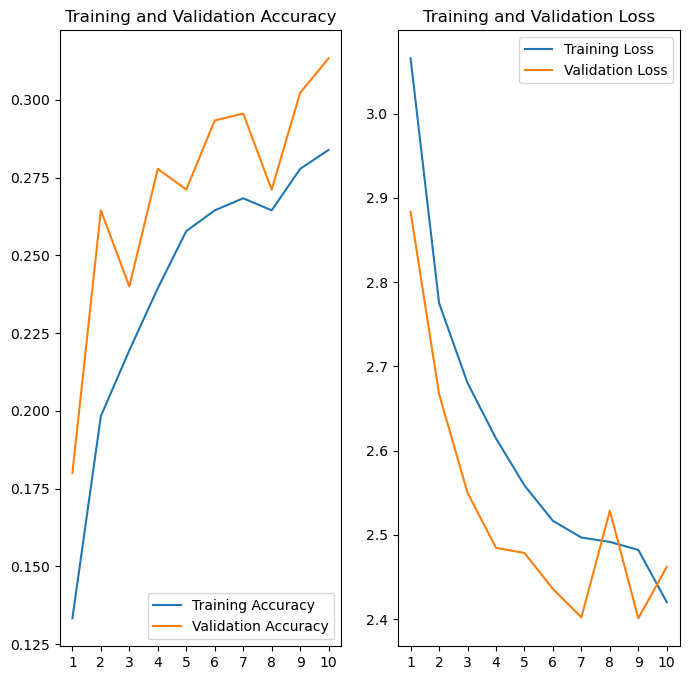

In [12]:
#application de la fonction de tracé
tracer_courbe_suivi("df_score_DL.joblib",13)